#  MultiDimensional Scans

Here we will create a 2D confidence interval for kV vs kF.

First, make sure we have the input workspace available:

In [5]:
%%bash
pwd
cat get_ws.sh
./get_ws.sh

/home/dsperka/CombineTutorial/CMSSW_8_1_0/src/HiggsAnalysis/CombinedLimit/combine_tutorials_2018/physics_models/physics_models
#!/bin/bash
if [ -f ../combine_intro/hgg.inputbkgdata_8TeV_MVA.root ]
then 
  ln -s ../combine_intro/hgg.inputbkgdata_8TeV_MVA.root hgg.inputbkgdata_8TeV_MVA.root
else
  wget https://dsperka.web.cern.ch/dsperka/hgg.inputbkgdata_8TeV_MVA.root
fi

wget https://dsperka.web.cern.ch/dsperka/htt_mt.input_8TeV.root

--2018-10-21 17:52:56--  https://dsperka.web.cern.ch/dsperka/hgg.inputbkgdata_8TeV_MVA.root
Resolving dsperka.web.cern.ch (dsperka.web.cern.ch)... 188.184.65.148, 2001:1458:201:a4::100:18e
Connecting to dsperka.web.cern.ch (dsperka.web.cern.ch)|188.184.65.148|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 44026570 (42M) [text/plain]
Saving to: 'hgg.inputbkgdata_8TeV_MVA.root.2'

     0K .......... .......... .......... .......... ..........  0%  151K 4m44s
    50K .......... .......... .......... .......... ..........  0%  228K 3m56s
   100K .......... .......... .......... .......... ..........  0%  456K 3m8s
   150K .......... .......... .......... .......... ..........  0%  457K 2m45s
   200K .......... .......... .......... .......... ..........  0% 37.5M 2m12s
   250K .......... .......... .......... .......... ..........  0%  458K 2m5s
   300K .......... .......... .......... .......... ..........  0% 53.0M 1m47s
   350K .......... .......... ..........

In [6]:
cat run_all.sh

#!/bin/bash

# Get the workspaces:
./get_ws.sh

# Combine the cards:
HGG="hgg_8TeV=hgg_8TeV_MVA_cat0145.txt"
HTT="htt_0_8TeV=htt_mt_0_8TeV.txt htt_1_8TeV=htt_mt_1_8TeV.txt htt_2_8TeV=htt_mt_2_8TeV.txt htt_3_8TeV=htt_mt_3_8TeV.txt htt_5_8TeV=htt_mt_5_8TeV.txt"

# Create combinations by decay mode
combineCards.py $HGG > comb_hgg.txt
combineCards.py $HTT > comb_htt.txt

# Create full combination
combineCards.py $HGG $HTT > comb_ggtt.txt

# Create workspace for hgg using cVcF Physics Model (Does't work in SWAN, but this is how to do it):
#text2workspace.py -m 125 -P HiggsAnalysis.CombinedLimit.HiggsCouplings:cVcF comb_hgg.txt -o comb_hgg_kvkf.root

# Run 1D fits for CV and CF using Hgg
combine -M MultiDimFit -m 125 --setPhysicsModelParameterRanges CV=0.0,5.0:CF=0.0,5.0 comb_hgg_kvkf.root --algo=singles --robustFit=1

# --- MultiDimFit ---
# best fit parameter values and profile-likelihood uncertainties:
#    CV :    +1.233   -0.501/+0.748 (68%)
#    CF :    +2.217   -1.476/+2.783 (68%)

# 

Now lets make a plot of the results:

In [2]:
TFile::Open("higgsCombineHggttCvCf.MultiDimFit.mH125.root")
    

(TFile *) 0x7fe21c14df50


In [5]:
.L contours2D.cxx

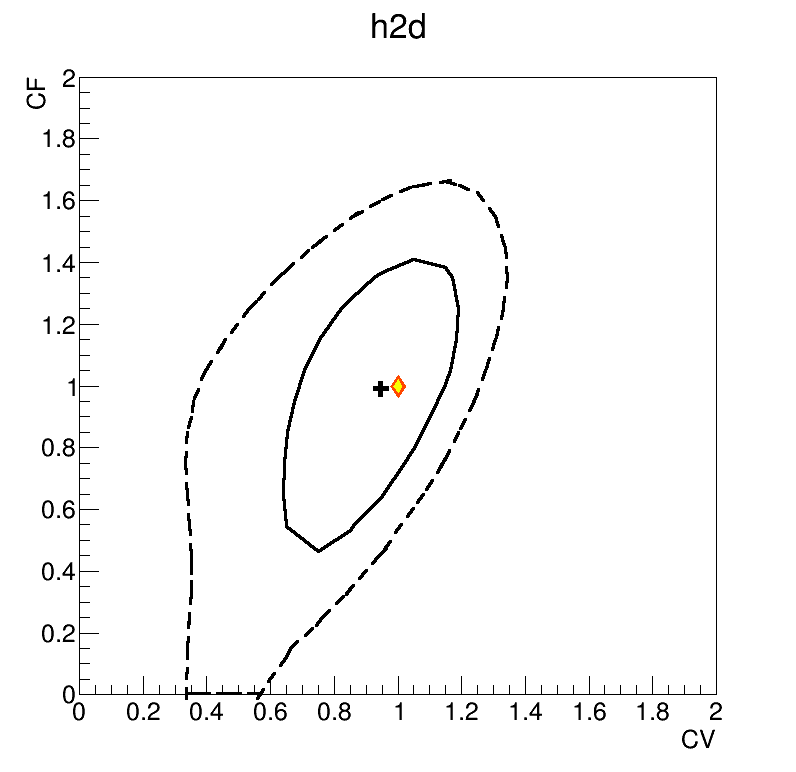

Getting contour at threshold 2.3 from h2d
Getting contour at threshold 5.99 from h2d
Getting contour at threshold 11.83 from h2d


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TFile::Append>: Replacing existing TH1: h2d framed (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h2d framed (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h2d framed (Potential memory leak).


In [10]:
contour2D("CV",20,0.0,2.0,"CF",20,0.0,2.0,1.,1.)